In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [6]:
x = pd.read_csv('/content/Placement_Data_Full_Class.xls')
print(x.head())

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [7]:
x["status"].value_counts()

,count
status,
Placed,148
Not Placed,67


In [8]:
x["sl_no"].nunique()

215

In [9]:
x = x.drop(["sl_no"], axis=1)
print(x.head())

  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [10]:
print(x.shape)

(215, 14)


In [11]:
print(x.isna().sum())

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [12]:
val = x['salary'].mean()
x["salary"] = x["salary"].fillna(val)
print(x.isna().sum())

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64


In [13]:
x["ssc_b"].value_counts()

,count
ssc_b,
Central,116
Others,99


In [14]:
x["ssc_b"].replace("Central", 1, inplace=True)
x["ssc_b"].replace("Others", 2, inplace=True)

<ipython-input-14-e21b3f1b71e2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x["ssc_b"].replace("Central", 1, inplace=True)
<ipython-input-14-e21b3f1b71e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [15]:
print(x.head())

  gender  ssc_p  ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t workex  \
0      M  67.00      2  91.00   Others  Commerce     58.00   Sci&Tech     No   
1      M  79.33      1  78.33   Others   Science     77.48   Sci&Tech    Yes   
2      M  65.00      1  68.00  Central      Arts     64.00  Comm&Mgmt     No   
3      M  56.00      1  52.00  Central   Science     52.00   Sci&Tech     No   
4      M  85.80      1  73.60  Central  Commerce     73.30  Comm&Mgmt     No   

   etest_p specialisation  mba_p      status         salary  
0     55.0         Mkt&HR  58.80      Placed  270000.000000  
1     86.5        Mkt&Fin  66.28      Placed  200000.000000  
2     75.0        Mkt&Fin  57.80      Placed  250000.000000  
3     66.0         Mkt&HR  59.43  Not Placed  288655.405405  
4     96.8        Mkt&Fin  55.50      Placed  425000.000000  


In [16]:
x["gender"].value_counts()

,count
gender,
M,139
F,76


In [17]:
x["gender"].replace("M", 1, inplace=True)
x["gender"].replace("F", 2, inplace=True)

<ipython-input-17-384dcfd9efe3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x["gender"].replace("M", 1, inplace=True)
<ipython-input-17-384dcfd9efe3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [18]:
x["hsc_b"].value_counts()

,count
hsc_b,
Others,131
Central,84


In [19]:
x["hsc_b"].replace("Central", 1, inplace=True)
x["hsc_b"].replace("Others", 2, inplace=True)
x["workex"].replace("No", 0, inplace=True)
x["workex"].replace("Yes", 1, inplace=True)
x["status"].replace("Not Placed", 0, inplace=True)
x["status"].replace("Placed", 1, inplace=True)

<ipython-input-19-ad176e11ad3d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x["hsc_b"].replace("Central", 1, inplace=True)
<ipython-input-19-ad176e11ad3d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [20]:
x["hsc_s"].value_counts()

,count
hsc_s,
Commerce,113
Science,91
Arts,11


In [21]:
x = pd.get_dummies(x, columns=["hsc_s"])
print(x.head())

   gender  ssc_p  ssc_b  hsc_p  hsc_b  degree_p   degree_t  workex  etest_p  \
0       1  67.00      2  91.00      2     58.00   Sci&Tech       0     55.0   
1       1  79.33      1  78.33      2     77.48   Sci&Tech       1     86.5   
2       1  65.00      1  68.00      1     64.00  Comm&Mgmt       0     75.0   
3       1  56.00      1  52.00      1     52.00   Sci&Tech       0     66.0   
4       1  85.80      1  73.60      1     73.30  Comm&Mgmt       0     96.8   

  specialisation  mba_p  status         salary  hsc_s_Arts  hsc_s_Commerce  \
0         Mkt&HR  58.80       1  270000.000000       False            True   
1        Mkt&Fin  66.28       1  200000.000000       False           False   
2        Mkt&Fin  57.80       1  250000.000000        True           False   
3         Mkt&HR  59.43       0  288655.405405       False           False   
4        Mkt&Fin  55.50       1  425000.000000       False            True   

   hsc_s_Science  
0          False  
1           True  

In [22]:
x["degree_t"].value_counts()

,count
degree_t,
Comm&Mgmt,145
Sci&Tech,59
Others,11


In [23]:
x = pd.get_dummies(x, columns=["degree_t"])
print(x.head())

   gender  ssc_p  ssc_b  hsc_p  hsc_b  degree_p  workex  etest_p  \
0       1  67.00      2  91.00      2     58.00       0     55.0   
1       1  79.33      1  78.33      2     77.48       1     86.5   
2       1  65.00      1  68.00      1     64.00       0     75.0   
3       1  56.00      1  52.00      1     52.00       0     66.0   
4       1  85.80      1  73.60      1     73.30       0     96.8   

  specialisation  mba_p  status         salary  hsc_s_Arts  hsc_s_Commerce  \
0         Mkt&HR  58.80       1  270000.000000       False            True   
1        Mkt&Fin  66.28       1  200000.000000       False           False   
2        Mkt&Fin  57.80       1  250000.000000        True           False   
3         Mkt&HR  59.43       0  288655.405405       False           False   
4        Mkt&Fin  55.50       1  425000.000000       False            True   

   hsc_s_Science  degree_t_Comm&Mgmt  degree_t_Others  degree_t_Sci&Tech  
0          False               False           

In [24]:
x["specialisation"].value_counts()

,count
specialisation,
Mkt&Fin,120
Mkt&HR,95


In [25]:
x["specialisation"].replace("Mkt&Fin", 1, inplace=True)
x["specialisation"].replace("Mkt&HR", 2, inplace=True)
print(x.head())
print(x.shape)

   gender  ssc_p  ssc_b  hsc_p  hsc_b  degree_p  workex  etest_p  \
0       1  67.00      2  91.00      2     58.00       0     55.0   
1       1  79.33      1  78.33      2     77.48       1     86.5   
2       1  65.00      1  68.00      1     64.00       0     75.0   
3       1  56.00      1  52.00      1     52.00       0     66.0   
4       1  85.80      1  73.60      1     73.30       0     96.8   

   specialisation  mba_p  status         salary  hsc_s_Arts  hsc_s_Commerce  \
0               2  58.80       1  270000.000000       False            True   
1               1  66.28       1  200000.000000       False           False   
2               1  57.80       1  250000.000000        True           False   
3               2  59.43       0  288655.405405       False           False   
4               1  55.50       1  425000.000000       False            True   

   hsc_s_Science  degree_t_Comm&Mgmt  degree_t_Others  degree_t_Sci&Tech  
0          False               False     

<ipython-input-25-78d4679037df>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x["specialisation"].replace("Mkt&Fin", 1, inplace=True)
<ipython-input-25-78d4679037df>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

<Axes: >

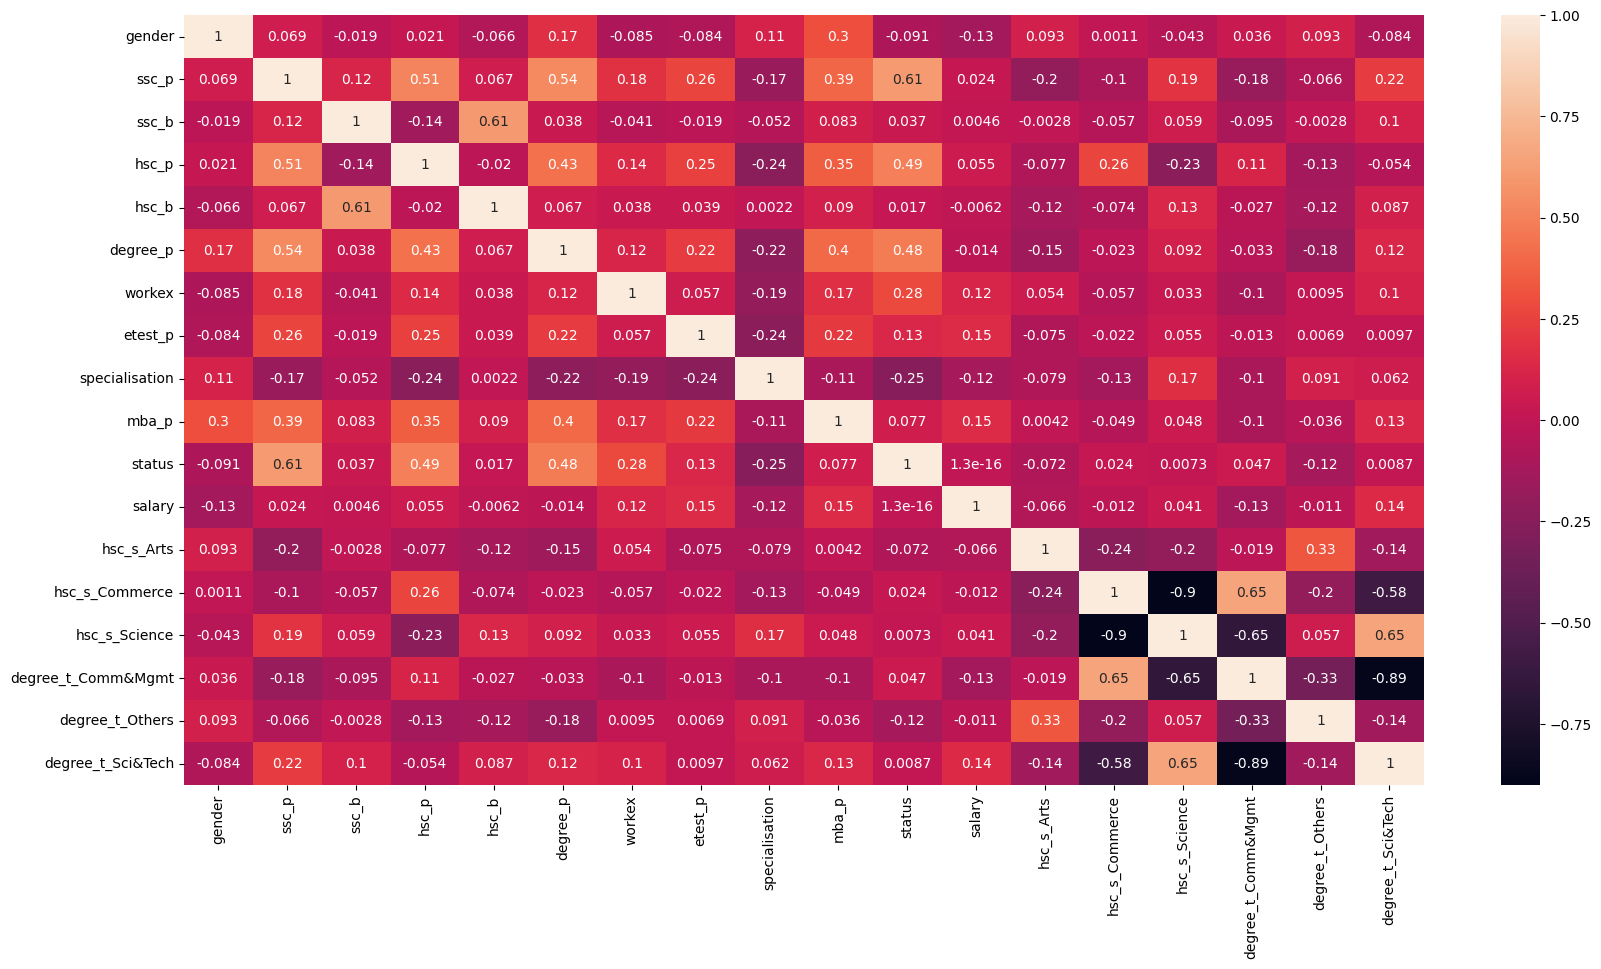

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(x.corr(),annot=True)

In [27]:
X = pd.concat([x.loc[:, "ssc_p"], x.loc[:, "hsc_p"], x.loc[:, "degree_p":"mba_p"]], axis=1)
y = x["status"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

ans_pred = model.predict(X_test)

In [28]:
print(accuracy_score(y_test, ans_pred))

0.9230769230769231


In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, ans_pred).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 41
TN: 19
FP: 5
FN: 0


In [30]:
recall_score(y_test, ans_pred)

1.0

In [31]:
precision_score(y_test, ans_pred)

0.8913043478260869

In [32]:
f1_score(y_test, ans_pred)

0.9425287356321839